#Idea: Wine Quality Prediction



---



> Description:
  **The focus is on predicting the quality of wine based on its chemical characteristics, offering a
real-world application of machine learning in the context of viticulture. The dataset
encompasses diverse chemical attributes, including density and acidity, which serve as the
features for three distinct classifier models.**



In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [154]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [155]:
df.shape

(1143, 13)

In [156]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [157]:
df.duplicated().any()

False

<h3>Here we will check the outlier </h3>



In [158]:
z_score = (df - np.mean(df,axis = 0))/np.std(df,axis = 0)
abs_z_score = np.abs(z_score)
threashold = 3

outlier = (abs_z_score>threashold).any(axis = 1)
outlier_index = df.index[outlier]

cleaned_data = df[~outlier]
print("cleaned_data length: ",len(cleaned_data))

cleaned_data length:  1041


In [159]:
print("original data length: ",len(df))

original data length:  1143


In [160]:
outliers = len(df) - len(cleaned_data)
print("Total outliers : ",outliers)

Total outliers :  102


In [161]:
cleaned_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [162]:
cleaned_data['Id'].nunique()

1041

In [163]:
cleaned_data.drop(columns = ['Id'],axis = 1,inplace = True)

<ipython-input-163-62bcd81c95a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop(columns = ['Id'],axis = 1,inplace = True)


In [164]:
cleaned_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [165]:
cleaned_data['quality'].unique()

array([5, 6, 7, 4, 8])

#Classifier Models:


---



>**Utilizing Random Forest, Stochastic Gradient Descent, and Support
Vector Classifier (SVC) for wine quality prediction.**

In [166]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [167]:
x = cleaned_data.drop(columns = ['quality'])
y = cleaned_data['quality']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 13)

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [168]:
model_params = {
    'svm' : {
        'model' : SVC(gamma = 'auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf','linear']
        }
    },
    'Gradient_decent':{
        'model': SGDClassifier(loss='log_loss'),
        'params':{
            'random_state' : [10,30,43]
        }
    },

    'RandomForestClassifier':{
        'model' : RandomForestClassifier(),
        'params': {
            'n_estimators' : [1,5,10,100],
            'random_state' : [10,30,40,42]
        }
    }
}

In [169]:
from sklearn.model_selection import GridSearchCV

In [170]:
scores = []

for model_name,mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score = False)
  clf.fit(x_train_scaler,y_train)
  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })

df1 = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
df1

,model,best_score,best_params
0,svm,0.619518,"{'C': 1, 'kernel': 'rbf'}"
1,Gradient_decent,0.538517,{'random_state': 30}
2,RandomForestClassifier,0.640085,"{'n_estimators': 100, 'random_state': 10}"


#Chemical Qualities:




---



> **Analyzing features like density and acidity as predictors for wine quality.**


In [171]:
df.drop(columns = ['Id'],axis = 1,inplace = True)

In [172]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [173]:
new_df = df.copy()

In [174]:
z_score = (new_df - np.mean(new_df,axis = 0))/np.std(new_df,axis =0)
abs_z_score = np.abs(z_score)
threashold = 3

outliers = (abs_z_score>threashold).any(axis =1)
outlier_index = new_df.index[outliers]

cleaned_data = new_df[~outliers]
print("cleaned_data : ",len(cleaned_data))
print("Original data : ",len(new_df))

cleaned_data :  1041
Original data :  1143


In [175]:
features = ['fixed acidity','volatile acidity','citric acid','pH','density']
new_x = cleaned_data[features]
new_y = cleaned_data['quality']

x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.2,random_state=42)

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)


In [176]:
cleaned_data.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [177]:
print(len(x_train_scaler))
print(len(y_train))

832
832


In [178]:
scores = []

for model_name,mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score = False)
  clf.fit(x_train_scaler,y_train)
  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })

df1 = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
df1

,model,best_score,best_params
0,svm,0.536065,"{'C': 1, 'kernel': 'rbf'}"
1,Gradient_decent,0.513239,{'random_state': 43}
2,RandomForestClassifier,0.584135,"{'n_estimators': 100, 'random_state': 10}"


In [179]:
from sklearn.metrics import accuracy_score

In [180]:
random_forest = RandomForestClassifier(n_estimators = 100,random_state = 10)
random_forest.fit(x_train_scaler,y_train)
random_forest_predict = random_forest.predict(x_test_scaler)
random_forest_accuracy = accuracy_score(y_test,random_forest_predict)
print(f"random_forest_accuracy : {round(random_forest_accuracy*100,2)}%")

random_forest_accuracy : 57.89%


In [181]:
gradient_decent = SGDClassifier(random_state = 43,loss = 'log_loss')
gradient_decent.fit(x_train_scaler,y_train)
gradient_decent_predict = gradient_decent.predict(x_test_scaler)
gradient_decent_accuracy = accuracy_score(y_test,gradient_decent_predict)
print(f"gradient_decent_accuracy : {round(gradient_decent_accuracy*100,2)}%")

gradient_decent_accuracy : 51.2%


In [182]:
svm = SVC(kernel='rbf',random_state = 42,C = 1)
svm.fit(x_train_scaler,y_train)
svm_predict = svm.predict(x_test_scaler)
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"svm_accuracy : {round(svm_accuracy*100,2)}%")

svm_accuracy : 54.55%


#Data Analysis Libraries:


---



> **Employing Pandas for data manipulation and Numpy for array
operations.**

In [183]:
cleaned_data['quality'].unique()

array([5, 6, 7, 4, 8])

In [184]:
bins = [0,2,4,6,8]
labels = ['very_low','low','medium','high']

In [185]:
df['quality'] = pd.cut(df['quality'],bins = bins,labels = labels)

In [186]:
df.head()
df['quality'].unique()

['medium', 'high', 'low']
Categories (4, object): ['very_low' < 'low' < 'medium' < 'high']

In [187]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1143 non-null   float64 
 1   volatile acidity      1143 non-null   float64 
 2   citric acid           1143 non-null   float64 
 3   residual sugar        1143 non-null   float64 
 4   chlorides             1143 non-null   float64 
 5   free sulfur dioxide   1143 non-null   float64 
 6   total sulfur dioxide  1143 non-null   float64 
 7   density               1143 non-null   float64 
 8   pH                    1143 non-null   float64 
 9   sulphates             1143 non-null   float64 
 10  alcohol               1143 non-null   float64 
 11  quality               1143 non-null   category
dtypes: category(1), float64(11)
memory usage: 99.7 KB


**Density**

In [189]:
density_min = np.min(cleaned_data['density'])
density_max = np.max(cleaned_data['density'])
density_mean = np.mean(cleaned_data['density'])
density_std = np.std(cleaned_data['density'])
print("Minimum Density : ",density_min)
print("Maximum Density : ",density_max)
print("Avg Density : ",density_mean)
print("Std Density : ",density_std)

Minimum Density :  0.99157
Maximum Density :  1.0022
Avg Density :  0.9966934774255524
Std Density :  0.0017340573965372618


**Fixed & Volatile Acidicity**



In [190]:
fixed_acidity_mean = np.mean(cleaned_data['fixed acidity'])
volatile_acidity_mean = np.mean(cleaned_data['volatile acidity'])

fixed_acidity_std = np.std(cleaned_data['fixed acidity'])
volatile_acidity_std = np.std(cleaned_data['volatile acidity'])


print(f"Fixed Acidity mean is : {round(fixed_acidity_mean,2)} with Standard Deviation {round(fixed_acidity_std,2)}")
print(f"Volatile Acidity mean is : {round(volatile_acidity_mean,2)} with Standard Deviation {round(volatile_acidity_std,2)}")

Fixed Acidity mean is : 8.29 with Standard Deviation 1.65
Volatile Acidity mean is : 0.53 with Standard Deviation 0.17


#Data Visualization:


---



> **Using Seaborn and Matplotlib for visualizing patterns and insights in the
dataset**

In [191]:
cleaned_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


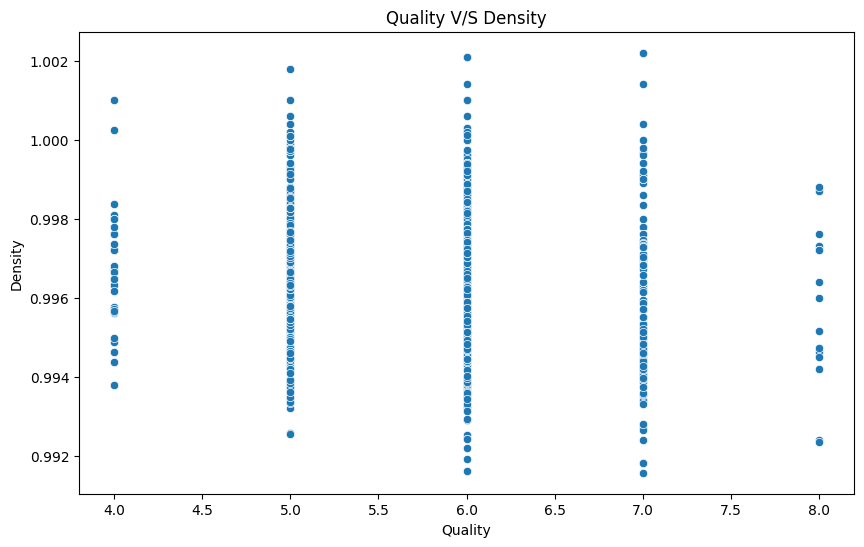

In [192]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = cleaned_data,x = 'quality',y = 'density')
plt.xlabel("Quality")
plt.ylabel("Density")
plt.title("Quality V/S Density")
plt.show()

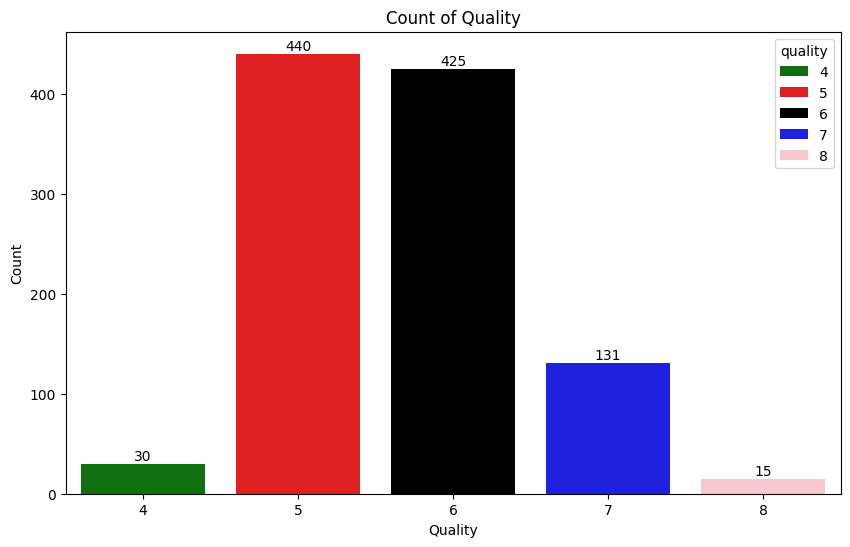

In [193]:
plt.figure(figsize = (10,6))
quality_cnt_plot = sns.countplot(data = cleaned_data,x = 'quality',hue = "quality",palette = ['Green','Red','Black','Blue','Pink'])
for x in quality_cnt_plot.containers:
  quality_cnt_plot.bar_label(x)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Count of Quality")
plt.show()

In [194]:
cleaned_nw1 = cleaned_data.loc[cleaned_data['pH']<2]
cleaned_nw2 = cleaned_data.loc[cleaned_data['pH']>4]

cleaned_nw2

#pH is in range of (2,4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [195]:
cleaned_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [196]:
def ph_color(ph):
  return ph.apply(lambda x:'red' if x<=3.3 else 'black')

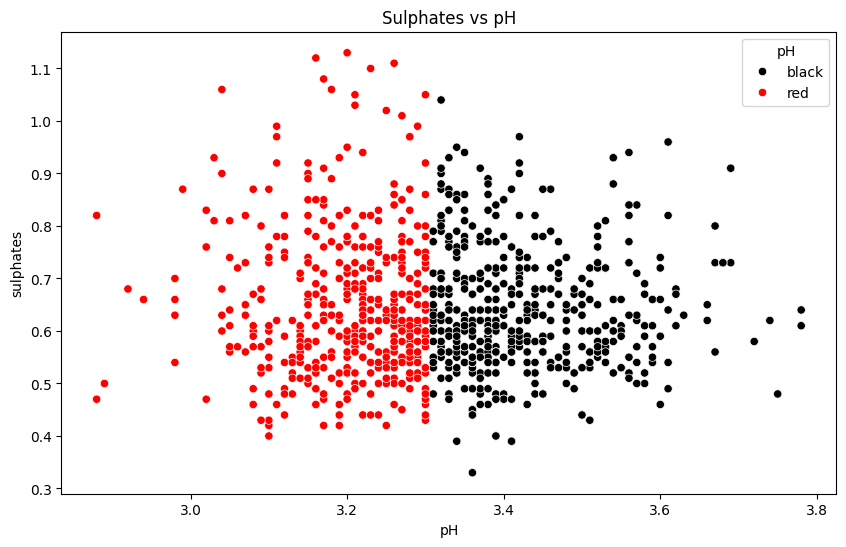

In [197]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = cleaned_data,x = 'pH',y = 'sulphates',hue = ph_color(cleaned_data['pH']),palette = ['Black','Red'])
plt.xlabel("pH")
plt.ylabel("sulphates")
plt.title("Sulphates vs pH")
plt.show()

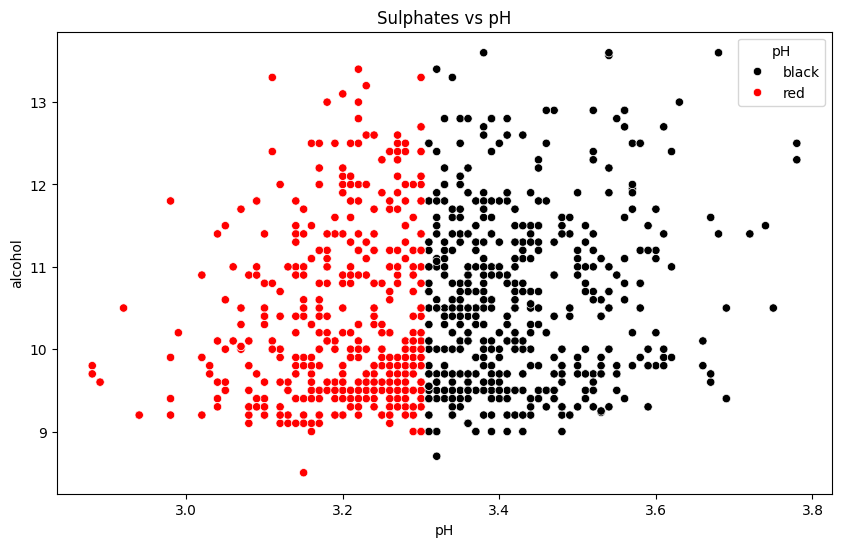

In [198]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = cleaned_data,x = 'pH',y = 'alcohol',hue = ph_color(cleaned_data['pH']),palette = ['Black','Red'])
plt.xlabel("pH")
plt.ylabel("alcohol")
plt.title("Sulphates vs pH")
plt.show()

In [199]:
cleaned_data['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       ,  9.2       ,
        9.9       , 10.5       ,  9.7       ,  9.3       , 10.1       ,
        9.6       , 10.8       , 10.2       , 10.9       , 10.7       ,
        9.1       , 10.3       ,  9.        , 13.        , 10.4       ,
       11.5       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 10.6       , 11.7       , 12.5       , 12.        ,
        8.7       , 13.3       , 12.9       , 12.3       , 11.4       ,
       11.2       , 11.1       , 13.4       , 11.3       , 11.6       ,
       11.8       , 11.9       , 12.7       , 13.2       , 12.1       ,
       13.1       , 13.6       , 10.03333333,  9.55      ,  8.5       ,
       11.06666667, 13.56666667, 11.95      ,  9.23333333,  9.25      ,
       10.55      ])

In [200]:
alcohol_bins = [9,10,11,12,13,14]
alcohol_labels = ['very_less','less','medium','more','heavy']

cleaned_data['alcohol_summary'] = pd.cut(cleaned_data['alcohol'],bins = alcohol_bins,labels = alcohol_labels)

<ipython-input-200-a6d8b0e7ad27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['alcohol_summary'] = pd.cut(cleaned_data['alcohol'],bins = alcohol_bins,labels = alcohol_labels)


In [201]:
cleaned_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_summary
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,very_less
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,very_less
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,very_less
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,very_less
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,very_less
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,less
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,very_less
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,less
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium


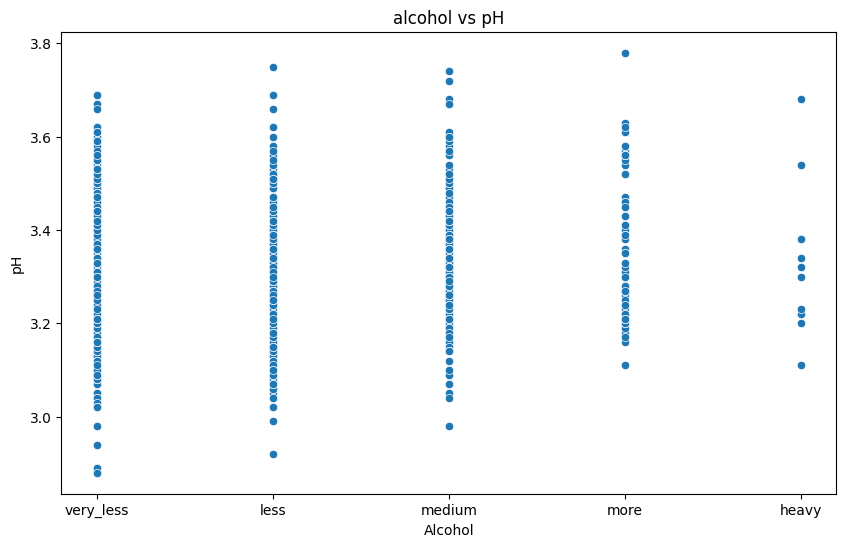

In [202]:
plt.figure(figsize = (10,6))
quality_cnt_plot = sns.scatterplot(data = cleaned_data,x = 'alcohol_summary',y = 'pH')

plt.xlabel("Alcohol")
plt.ylabel("pH")
plt.title("alcohol vs pH")
plt.show()